In [32]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import math
import colorsys

In [82]:
mario = plt.imread('mario.png')

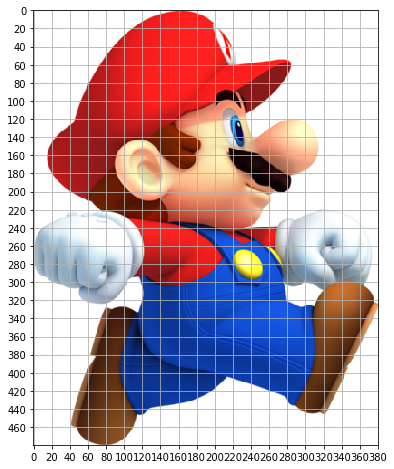

In [51]:
plt.figure(figsize=(8,8))
plt.imshow(mario)
plt.xticks(range(0,400,20))
plt.yticks(range(0,480,20))
plt.grid(True, 'both')

[[[ 0.          0.81203008  0.52156866]
  [ 0.          0.81343287  0.52549022]
  [ 0.          0.80597019  0.52549022]
  [ 0.          0.80597019  0.52549022]
  [ 0.          0.81343287  0.52549022]
  [ 0.          0.80597019  0.52549022]
  [ 0.          0.80740744  0.52941179]
  [ 0.          0.80740744  0.52941179]
  [ 0.          0.81343287  0.52549022]
  [ 0.          0.80740744  0.52941179]]

 [[ 0.          0.81203008  0.52156866]
  [ 0.          0.81203008  0.52156866]
  [ 0.          0.81203008  0.52156866]
  [ 0.          0.81343287  0.52549022]
  [ 0.          0.80597019  0.52549022]
  [ 0.          0.81343287  0.52549022]
  [ 0.          0.81343287  0.52549022]
  [ 0.          0.80740744  0.52941179]
  [ 0.          0.81343287  0.52549022]
  [ 0.          0.81343287  0.52549022]]

 [[ 0.          0.81203008  0.52156866]
  [ 0.          0.81203008  0.52156866]
  [ 0.          0.81203008  0.52156866]
  [ 0.          0.81203008  0.52156866]
  [ 0.          0.80597019  0.525490

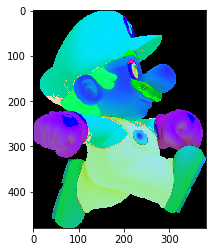

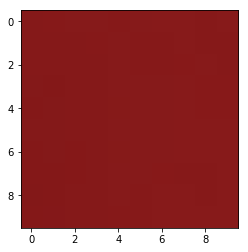

In [117]:
def flat(p):
        return p.reshape(-1, p.shape[-1])
    
hat = mario[60:80,180:200]
darkhatRGB = mario[80:90, 240:250]


flat(mario)
hsv = mpl.colors.rgb_to_hsv(mario[:,:,:3])
darkhatHSV = hsv[80:90, 240:250]
print(darkhatHSV)
plt.imshow(hsv)
plt.figure()
plt.imshow(darkhat[:,:,:3])

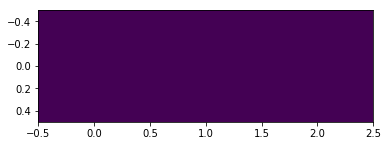

In [23]:

# print(nx,ny)


plt.figure(figsize=(8,8))
plt.xticks(range(0,400,20))
plt.yticks(range(0,480,20))
plt.grid(True, 'both',ls='--')
plt.xlim(0,300)
plt.ylim(320,0)
def red_mask(pic):
    def flat(p):
        return p.reshape(-1, p.shape[-1])
    ny = pic.shape[0]
    nx = pic.shape[1]
    mask = np.zeros(pic.shape)[:,:,:3]
    flat(mask)
    mask = mpl.colors.rgb_to_hsv(mask)
    # EDIT FOR LOOP TO MATCH HSV VALUE
    for i in range(1,ny):
        for j in range(1,nx):
            h = mario[i,j][0]
            s = mario[i,j][1]
            v = mario[i,j][2]
#             print(h,s,v)
            if( h < 0.34 and s < 0.7 and v <0.1):
                mask[i,j] = np.array([1,1,1]) #white
            else:
                mask[i,j] = np.array([0,0,0])
    return mask

masked = red_mask(mario);
plt.imshow(masked)

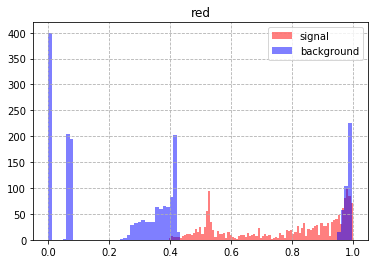

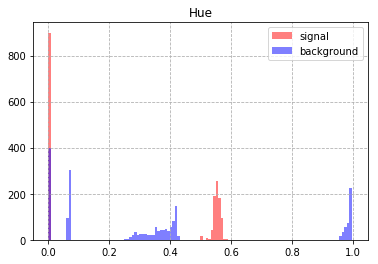

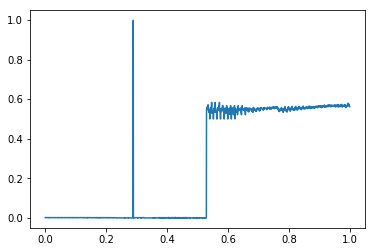

In [108]:
# mario = mpl.colors.rgb_to_hsv(mario[:,:,:3])
hat = mario[60:80,180:200]
dark_hat = mario[80:90, 240:250]
hair = mario[200:220, 80:100]
shoe = mario[420:440, 60:80]
armpit = mario[280:300, 140:160]

right_arm = mario[240:260, 40:60]
left_arm = mario[260:280,340:360]
dress = mario[340:360, 220:240]
cheek = mario[180:200,180:200]
white_bg = mario[440:460, 0:20]

# define signal(red cloth/hat) and background(other stuff)
# signal and background is now just an array of shape (npixel, 3)
# this will make you life simpler when you analyze stuff
# print the shape to see what it looks like
def flat(p):
    return p.reshape(-1, p.shape[-1])

signal = np.concatenate((
    flat(hat),
    flat(dark_hat),
    flat(armpit),
    flat(right_arm),
    flat(left_arm)
))[:, :3] # remove the alpha channel

background = np.concatenate((
    flat(hair),
    flat(shoe),
    flat(dress),
    flat(cheek),
    flat(white_bg)
))[:, :3] # remove the alpha channel

# print(signal)
# print(signal[:,:2])

nbin = int(256/3)
nbinhsv = int(120)

plt.figure()
plt.title("red")
plt.hist(signal[:,0],alpha=0.5,color='r',label='signal', bins=nbin );
plt.hist(background[:,0],alpha=0.5,color='b',label='background',bins=nbin);
plt.grid(ls='--')
plt.legend()

signal = mpl.colors.rgb_to_hsv(signal)
plt.figure()
plt.title("Hue")
plt.hist(signal[:,0],alpha=0.5,color='r',label='signal', bins=nbinhsv );
plt.hist(background[:,0],alpha=0.5,color='b',label='background',bins=nbinhsv);
plt.grid(ls='--')
plt.legend()

plt.figure()
plt.plot(np.linspace(0,1,1700),signal[:,0])

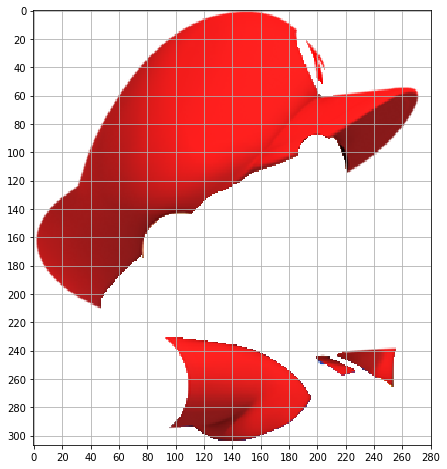

In [7]:
sampling = plt.imread('sampling.png')
plt.figure(figsize=(8,8))
plt.imshow(sampling)
plt.xticks(range(0,300,20))
plt.yticks(range(0,320,20))
plt.grid(True, 'both')

In [18]:
# print(sampling[140:160,60:80])

[[[ 0.40021232  0.8820225   0.69803923]
  [ 0.39957264  0.87640452  0.69803923]
  [ 0.40021232  0.8820225   0.69803923]
  ..., 
  [ 0.40021929  0.87861276  0.67843139]
  [ 0.40021929  0.87861276  0.67843139]
  [ 0.39955851  0.87790698  0.67450982]]

 [[ 0.40021232  0.8820225   0.69803923]
  [ 0.40021232  0.8820225   0.69803923]
  [ 0.40021232  0.8820225   0.69803923]
  ..., 
  [ 0.40021929  0.87861276  0.67843139]
  [ 0.40021929  0.88372093  0.67450982]
  [ 0.39955851  0.88304096  0.67058825]]

 [[ 0.40021232  0.8820225   0.69803923]
  [ 0.40021232  0.8820225   0.69803923]
  [ 0.40021232  0.8820225   0.69803923]
  ..., 
  [ 0.40021929  0.88372093  0.67450982]
  [ 0.40021929  0.88372093  0.67450982]
  [ 0.40000001  0.88235295  0.66666669]]

 ..., 
 [[ 0.40000001  0.88068181  0.6901961 ]
  [ 0.39935064  0.88        0.68627453]
  [ 0.39935064  0.88        0.68627453]
  ..., 
  [ 0.40064105  0.89655173  0.68235296]
  [ 0.40021232  0.89714289  0.68627453]
  [ 0.39957264  0.89142859  0.68627

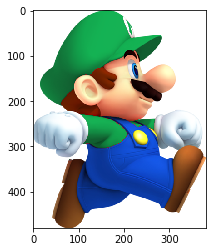

In [112]:
luigi = plt.imread("luigi.png")
plt.imshow(luigi)

luigiHSV = mpl.colors.rgb_to_hsv(luigi[:,:,:3])
hat = luigiHSV[60:80,180:200]
dark_hat = luigiHSV[80:90, 240:250]

print(hat)